In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## make some job files for Ar
num_per_chunk = 1e7
nmc_zero_mass = 1e10
nmc_nonzero_mass = 1e8
num_reps_per_file = 100

iso = "ar_37"
mnu = 0

job_file = "/home/dcm42/impulse/steriles/job_files/ar_37_jobs.txt"
jf = open(job_file, 'wt')
nchunks = int(nmc_zero_mass/(num_reps_per_file*num_per_chunk))
print(nchunks)
for i in range(nchunks):
    jf.write("module load miniconda; source activate; conda activate py37_dev; python calculate_pdfs.py %s %.1f %d %d\n"%(iso, mnu, num_reps_per_file, i))
jf.close()

# 100 reps and 1e7 per chunk is 1.5 gb and 15 minutes
# dsq --job-file job_files/ar_37_jobs.txt --mem-per-cpu 4g -t 30:00 --mail-type NONE

iso_dat = np.loadtxt("/home/dcm42/impulse/steriles/data_files/%s.txt"%iso, delimiter=',', skiprows=3)
Q, t12, A = iso_dat[0, :]
## now as a function of sterile mass
mass_list = np.linspace(1, Q, 100)


10


In [2]:
nfiles = 10
for i in range(nfiles):
    pdf = np.load("data_files/ar_37_mnu_0.0_pdf_%d.npz"%i)
    
    if(i==0):
        p = pdf['pdf']
    else:
        p += pdf['pdf']

x = pdf['x']

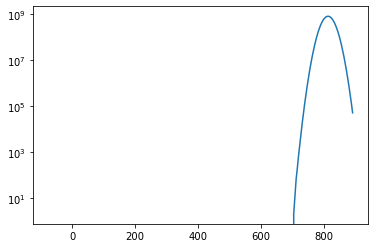

In [4]:
plt.figure()
plt.semilogy(x, p)
plt.show()